In [1]:
import pandas as pd
import yfinance as yf

In [21]:
symbol = "^NSEI"
start = "2018-09-14"
end = "2023-09-14"

In [22]:
nifty = yf.download(symbol, start, end)

[*********************100%%**********************]  1 of 1 completed


In [23]:

df = nifty.reset_index()
df["Date"] = pd.to_datetime(df.Date).copy()
df["Day"] = df.Date.dt.day_name()
column_to_move = df.pop("Day")
df.insert(1, "Day", column_to_move)
df.head()

,Date,Day,Open,High,Low,Close,Adj Close,Volume
0,2018-09-14,Friday,11443.500000,11523.250000,11430.549805,11515.200195,11515.200195,276600
1,2018-09-17,Monday,11464.950195,11464.950195,11366.900391,11377.750000,11377.750000,201400
2,2018-09-18,Tuesday,11381.549805,11411.450195,11268.950195,11278.900391,11278.900391,240900
3,2018-09-19,Wednesday,11326.650391,11332.049805,11210.900391,11234.349609,11234.349609,250600
4,2018-09-21,Friday,11271.299805,11346.799805,10866.450195,11143.099609,11143.099609,719000


In [24]:
df_thus = df.loc[df.Day == "Thursday"]
df_thus.head(5)

,Date,Day,Open,High,Low,Close,Adj Close,Volume
8,2018-09-27,Thursday,11079.799805,11089.450195,10953.349609,10977.549805,10977.549805,405700
12,2018-10-04,Thursday,10754.700195,10754.700195,10547.250000,10599.250000,10599.250000,425100
17,2018-10-11,Thursday,10169.799805,10335.950195,10138.599609,10234.650391,10234.650391,483500
26,2018-10-25,Thursday,10135.049805,10166.599609,10079.299805,10124.900391,10124.900391,0
31,2018-11-01,Thursday,10441.700195,10441.900391,10341.900391,10380.450195,10380.450195,348500


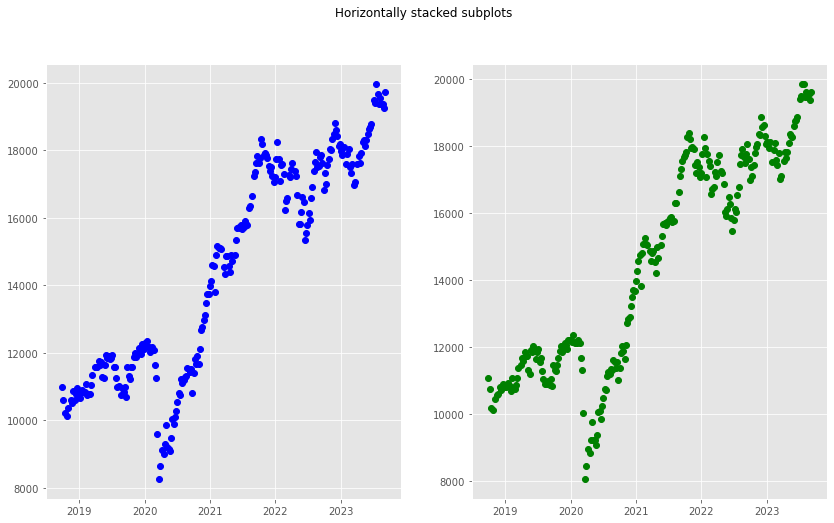

In [25]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,8))
fig.suptitle('Horizontally stacked subplots')
ax1.plot(df_thus.Date, df_thus.Close, "ob")
ax2.plot(df_thus.Date, df_thus.Open, "og")
plt.show()


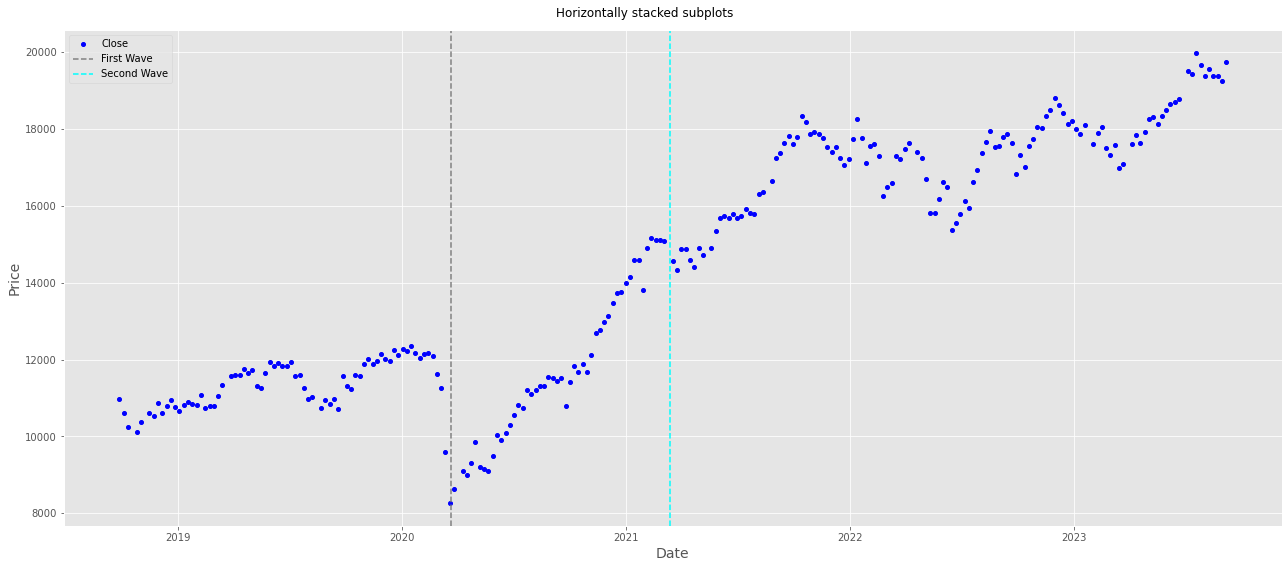

In [39]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

fig, ax = plt.subplots(figsize=(18,8))
fig.suptitle('Horizontally stacked subplots')
ax.plot(df_thus.Date, df_thus.Close, "ob", label="Close", markersize=4)
# ax.plot(df_thus.Date, df_thus.Open, "og")

First_wave_start = pd.to_datetime("2020-03-21")
Second_wave_start = pd.to_datetime("March 13, 2021")


ax.axvline(First_wave_start, color='grey', linestyle='--', label='First Wave')
ax.axvline(Second_wave_start, color='cyan', linestyle='--', label='Second Wave')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.legend()
plt.tight_layout()
plt.savefig("../plots/nifty50_pandemic_analysis.png", dpi=400)
plt.show()
